In [18]:
import pandas as pd 
tabela = pd.read_csv('C:/Users/Brunin/Documents/Meus_Repositórios_Git/Machine_Learning_Regressão_Linear/notebook/HousingData.csv')
display(tabela)
#Bibliotecas para o metodo de regressão linear



,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


## Descrição de cada coluna 

### CRIM 
 _ Taxa de criminalidade per capita por cidade 

### ZN 
_ Proporção de terrenos residenciais da cidade com lotes acima de 25.000 pés quadrados.

### INDUS 
_ Proporção de acres de negócios não varejistas na cidade.

### CHAS 
_  Variável dummy (0 ou 1) indicando se o imóvel está próximo ao rio Charles (1 = sim).

###  NOX 
_ Nível de concentração de óxidos de nitrogênio (em partes por 10 milhões).

### RM 
_ Número médio de cômodos por residência.

### AGE
_ Proporção de unidades ocupadas construídas antes de 1940.

### DIS 
_ Distâncias ponderadas aos cinco centros de emprego de Boston.

### RAD 
_ Índice de acessibilidade a rodovias radiais.

### TAX 
_ Taxa de imposto sobre propriedade por 10.000 dólares.

### PTRATIO
 _ Proporção aluno/professor nas escolas da cidade.

### B 
_ Medida relacionada à população negra da cidade: 
 onde Bk é a proporção de pessoas negras.

### LSTAT 
_ Percentual da população com status socioeconômico baixo.

### MEDV 
_  Valor mediano das casas ocupadas pelos proprietários (em milhares de dólares).

In [ ]:
tabela.isna().sum()
# É possível perceber que não há valores nulos na tabela.




CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


 Iniciando Treinamento 

 Erro quadrático médio: 31.45
 Coeficiente de determinação (R²): 0.63

Gráfico de Dispersão (Real vs. Previsto) salvo como 'grafico_regressao_boston.png'


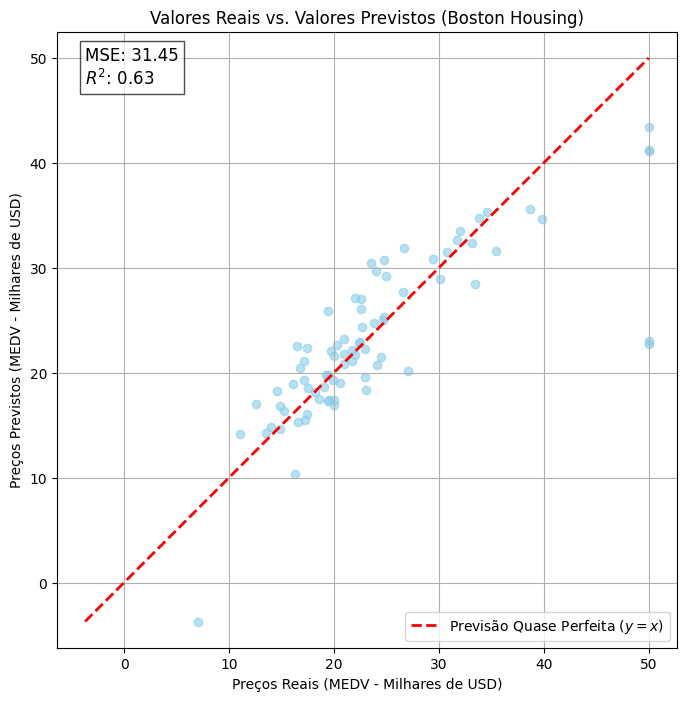

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score , mean_squared_error
import matplotlib.pyplot as plt
import numpy as np 
tabela_limpa= tabela.dropna()
X = tabela_limpa.drop('MEDV' , axis=1) # Features
Y = tabela_limpa['MEDV'] # Variável Alvo

X_train , X_test , Y_train , Y_test = train_test_split(X, Y, test_size=0.2 , random_state=42)


modelo = LinearRegression()
modelo.fit (X_train , Y_train )
print("\n Iniciando Treinamento ")

previsao = modelo.predict(X_test)
mse = mean_squared_error(Y_test , previsao)
r2 = r2_score(Y_test , previsao)


print (f"\n Erro quadrático médio: {mse:.2f}") 
print (f" Coeficiente de determinação (R²): {r2:.2f}") 


plt.figure (figsize=(8,8))
plt.scatter(Y_test , previsao , color ='skyblue' , alpha = 0.6)

# Linha de referência y=x
maximo = max(Y_test.max() , previsao.max())
minimo = min(Y_test.min() , previsao.min())
plt.plot([minimo , maximo] , [minimo , maximo] , color = 'red' , linestyle = '--' , linewidth =2 , label ='Previsão Quase Perfeita ($y=x$)')

# Detalhes do Gráfico
plt.title('Valores Reais vs. Valores Previstos (Boston Housing)')
plt.xlabel(f'Preços Reais (MEDV - Milhares de USD)')
plt.ylabel(f'Preços Previstos (MEDV - Milhares de USD)')

# Anotação das Métricas
plt.text(x=minimo , y=maximo * 0.95, 
         s=f'MSE: {mse:.2f}\n$R^2$: {r2:.2f}', 
         fontsize=12, 
         bbox=dict(facecolor='white', alpha=0.7))

plt.legend()
plt.grid(True)
plt.axis('equal') 
plt.savefig('grafico_regressao_boston.png')
print("\nGráfico de Dispersão (Real vs. Previsto) salvo como 'grafico_regressao_boston.png'")